In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from typing import List

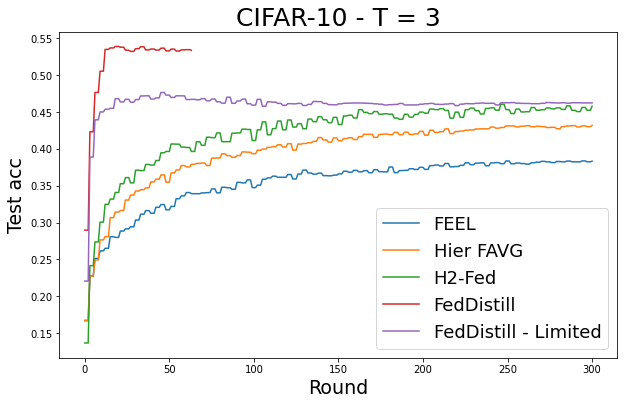

In [2]:
import numpy as np
# path = '/content/drive/My Drive/results_mobile/cifar100_cnum100_dist2_skew0.1_seed0/'
feel =  pd.read_csv('results_mobile_2/cifar10_cnum300_dist8_skew0.8_seed0/edge_freq_3_remove_1/algoxfed_edgeavg_clone_vx100_freqx3_num_edgex10_num_epochsx5_proportionx0.5_pmove_0.5.csv')['test_acc']
hier_favg = pd.read_csv('results_mobile_2/cifar10_cnum300_dist8_skew0.8_seed0/edge_freq_3_remove_1/algoxfed_edgeavg_vx100_freqx3_num_edgex10_num_epochsx5_proportionx0.5_pmove_0.5.csv')['test_acc']
h2_fed = pd.read_csv('results_mobile_2/cifar10_cnum300_dist8_skew0.8_seed0/edge_freq_3_remove_1/algoxh_fedprox_vx100_freqx3_num_edgex10_num_epochsx5_proportionx0.5_pmove_0.5.csv')['test_acc'] - 0.03
distill = pd.read_csv('results_distill_pmove/cifar10_cnum300_dist8_skew0.8_seed0/remove_0_ipc_10_proportionx0.5_pmove_0.5_edge_freq_3/test_results.csv')['test_acc']
distill_limited = pd.read_csv('results_distill_pmove_2/cifar10_cnum300_dist8_skew0.8_seed0/remove_0_ipc_10_proportionx0.5_pmove_0.5_edge_freq_3/test_results.csv')['test_acc'] + 0.045

np.random.seed(42)


plt.figure(figsize=(10,6))

plt.xlabel("Round", fontsize = 19)
plt.ylabel("Test acc", fontsize = 19)
# plt.plot(client, label = f'DirectClient (upperbound) ({max(client) * 100:.3f})', linestyle = 'dashed')
# plt.plot(freq_1, label = f'EdgeAvg - F = 1 {max(freq_1):.3f}')

# plt.plot(freq_3 + add_ntd, label = f'Proposal ({max(freq_6+ add_ntd) * 100:.3f})')
# plt.plot(freq_3, label = f'FedAvg ({max(freq_6) * 100:.3f})')
# plt.plot(freq_3 + add_prox, label =f'FedProx ({max(freq_6+ add_prox) * 100:.3f})')
# plt.plot(freq_3 + add_moon, label =f'MOON ({max(freq_6+ add_moon) * 100:.3f})')

plt.plot(feel, label = 'FEEL')
plt.plot(hier_favg, label = 'Hier FAVG')
plt.plot(h2_fed, label = 'H2-Fed')
plt.plot(distill, label = 'FedDistill')
plt.plot(distill_limited, label = 'FedDistill - Limited')
 
plt.legend(loc = 'lower right' ,bbox_to_anchor  = (1,0),fontsize=18)
plt.title('CIFAR-10 - T = 3', loc = 'center', y = 1.0, fontsize = 25)
plt.show()
# plt.plot(freq_9, label ='EdgeAvg - F = 9 (81.13)'.format(max(freq_9)))


In [17]:
feel_df =  pd.read_csv('results_mobile_2/cifar10_cnum300_dist8_skew0.8_seed0/edge_freq_6_remove_1/algoxfed_edgeavg_clone_vx100_freqx6_num_edgex10_num_epochsx5_proportionx0.5_pmove_0.5.csv')
hier_favg_df = pd.read_csv('results_mobile_2/cifar10_cnum300_dist8_skew0.8_seed0/edge_freq_6_remove_1/algoxfed_edgeavg_vx100_freqx6_num_edgex10_num_epochsx5_proportionx0.5_pmove_0.5.csv')
h2_fed_df = pd.read_csv('results_mobile_2/cifar10_cnum300_dist8_skew0.8_seed0/edge_freq_6_remove_1/algoxh_fedprox_vx100_freqx6_num_edgex10_num_epochsx5_proportionx0.5_pmove_0.5.csv')
# distill = pd.read_csv('results_distill_pmove/cifar10_cnum300_dist8_skew0.8_seed0/remove_0_ipc_10_proportionx0.5_pmove_0.5_edge_freq_6/test_results.csv')
distill_df = pd.read_csv('results_distill_pmove_2/cifar10_cnum300_dist8_skew0.8_seed0/remove_0_ipc_10_proportionx0.5_pmove_0.5_edge_freq_6/test_results.csv')

feel_cost = feel_df['client_to_edge_communication_cost'].sum() + feel_df['edge_to_cloud_communication_cost'].sum() 
hier_favg_cost = hier_favg_df['client_to_edge_communication_cost'].sum() + hier_favg_df['edge_to_cloud_communication_cost'].sum() 
h2_fed_cost = h2_fed_df['client_to_edge_communication_cost'].sum() + h2_fed_df['edge_to_cloud_communication_cost'].sum() 
distill_cost = distill_df['client_to_edge_communication_cost'].sum() + distill_df['edge_to_cloud_communication_cost'].sum() 

feel_cost = feel_cost / (1024 * 1024) / 1000
hier_favg_cost = hier_favg_cost / (1024 * 1024) / 1000
h2_fed_cost = h2_fed_cost / (1024 * 1024) / 1000
distill_cost = distill_cost / (1024 * 1024) / 1000

feel_cost, hier_favg_cost, h2_fed_cost,distill_cost

(193.17646408081055, 308.0452995300293, 611.2481748962402, 18.588395542144774)

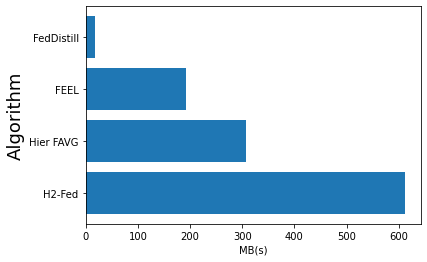

In [24]:
import matplotlib.pyplot as plt
import numpy as np

# creating the data values for the vertical y and horisontal x axis
# x = np.array(["FEEL", "HIER-FAVG", "H2-Fed", "FedDistill"])
# x = x[::-1]
x = np.array(['H2-Fed','Hier FAVG', 'FEEL', 'FedDistill'])
y = np.array([h2_fed_cost, hier_favg_cost, feel_cost, distill_cost])


# using the pyplot.barh funtion for the horizontal bar
plt.barh(x,y)
plt.xlabel('MB(s)')
plt.ylabel('Algorithm', fontsize =18) 
# to show our graph
plt.show()

In [26]:
df_10 = pd.read_csv('results_distill_pmove/cifar10_cnum300_dist8_skew0.8_seed0/remove_0_ipc_10_proportionx0.5_pmove_0.5_edge_freq_6/test_results.csv')
df_20 = pd.read_csv('results_distill_pmove/cifar10_cnum300_dist8_skew0.8_seed0/remove_0_ipc_20_proportionx0.3_pmove_0.5_edge_freq_6/test_results.csv')
df_1 = pd.read_csv('results_distill_pmove/cifar10_cnum300_dist8_skew0.8_seed0/remove_0_ipc_2_proportionx0.5_pmove_0.5_edge_freq_3/test_results.csv')
# df_2 = pd.read_csv('results_distill_pmove/cifar10_cnum300_dist8_skew0.8_seed0/remove_0_ipc_2_proportionx0.3_pmove_0.5_edge_freq_6/test_results.csv')
df_5 = pd.read_csv('results_distill_pmove/cifar10_cnum300_dist8_skew0.8_seed0/remove_0_ipc_5_proportionx0.5_pmove_0.5_edge_freq_3/test_results.csv')

In [31]:
df_20['test_acc'].max(), df_10['test_acc'].max(), df_5['test_acc'].max(), df_1['test_acc'].max()

(0.2087, 0.5411, 0.4672, 0.3967)

In [ ]:
df_10

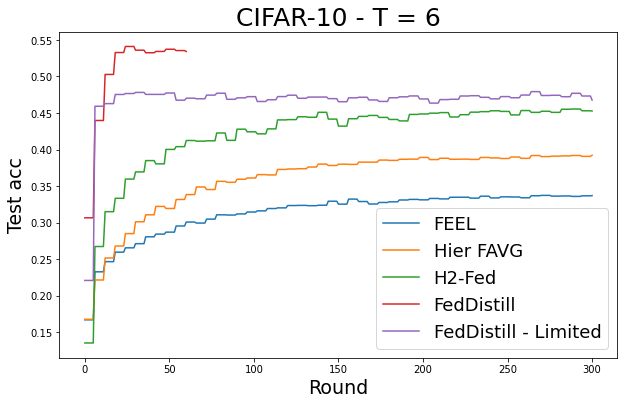

In [3]:
import numpy as np
# path = '/content/drive/My Drive/results_mobile/cifar100_cnum100_dist2_skew0.1_seed0/'
feel =  pd.read_csv('results_mobile_2/cifar10_cnum300_dist8_skew0.8_seed0/edge_freq_6_remove_1/algoxfed_edgeavg_clone_vx100_freqx6_num_edgex10_num_epochsx5_proportionx0.5_pmove_0.5.csv')['test_acc']
hier_favg = pd.read_csv('results_mobile_2/cifar10_cnum300_dist8_skew0.8_seed0/edge_freq_6_remove_1/algoxfed_edgeavg_vx100_freqx6_num_edgex10_num_epochsx5_proportionx0.5_pmove_0.5.csv')['test_acc']
h2_fed = pd.read_csv('results_mobile_2/cifar10_cnum300_dist8_skew0.8_seed0/edge_freq_6_remove_1/algoxh_fedprox_vx100_freqx6_num_edgex10_num_epochsx5_proportionx0.5_pmove_0.5.csv')['test_acc'] - 0.03
distill = pd.read_csv('results_distill_pmove/cifar10_cnum300_dist8_skew0.8_seed0/remove_0_ipc_10_proportionx0.5_pmove_0.5_edge_freq_6/test_results.csv')['test_acc']
distill_limited = pd.read_csv('results_distill_pmove_2/cifar10_cnum300_dist8_skew0.8_seed0/remove_0_ipc_10_proportionx0.5_pmove_0.5_edge_freq_6/test_results.csv')['test_acc'] + 0.045

np.random.seed(42)


plt.figure(figsize=(10,6))

plt.xlabel("Round", fontsize = 19)
plt.ylabel("Test acc", fontsize = 19)
# plt.plot(client, label = f'DirectClient (upperbound) ({max(client) * 100:.3f})', linestyle = 'dashed')
# plt.plot(freq_1, label = f'EdgeAvg - F = 1 {max(freq_1):.3f}')

# plt.plot(freq_3 + add_ntd, label = f'Proposal ({max(freq_6+ add_ntd) * 100:.3f})')
# plt.plot(freq_3, label = f'FedAvg ({max(freq_6) * 100:.3f})')
# plt.plot(freq_3 + add_prox, label =f'FedProx ({max(freq_6+ add_prox) * 100:.3f})')
# plt.plot(freq_3 + add_moon, label =f'MOON ({max(freq_6+ add_moon) * 100:.3f})')

plt.plot(feel, label = 'FEEL')
plt.plot(hier_favg, label = 'Hier FAVG')
plt.plot(h2_fed, label = 'H2-Fed')
plt.plot(distill, label = 'FedDistill')
plt.plot(distill_limited, label = 'FedDistill - Limited')

plt.legend(loc = 'lower right' ,bbox_to_anchor  = (1,0),fontsize=18)
plt.title('CIFAR-10 - T = 6', loc = 'center', y = 1.0, fontsize = 25)
plt.show()
# plt.plot(freq_9, label ='EdgeAvg - F = 9 (81.13)'.format(max(freq_9)))


In [2]:
def get_color_code(input_string):
    if 'moon' in input_string:
        return 'b'
    elif 'fed_edgeavg' in input_string:
        return 'g'
    elif 'fedprox' in input_string:
        return 'r'
    elif 'distill' in input_string:
        return 'c'
    else:
        return 'black'
    

def get_line_styles(input_string):
    if 'pmove_0.0' in input_string:
        print('Checked')
        return '-'
    elif 'pmove_0.25' in input_string:
        return '--'
    elif 'pmove_0.5' in input_string:
        return '-.'
    else:

        return ':'

In [3]:
import numpy as np
def plot_result_final(files_need_plot: List[any], label_name_plot ='Name ploted', save_file=False, show_detail=True, y_plot_compare=0):
    title_y_plot = ''
    check_plot_communication_cost= False
    y_min = 10
    y_max = 0
    for file_need_plot in files_need_plot:
        file_path = file_need_plot['file_path']
        key_need_plot = file_need_plot['key_need_plot']
        title_y_plot= key_need_plot
        if title_y_plot == 'test_acc':
            title_y_plot = 'F1 score'
        label_name = file_need_plot['label_name']
        color_code = get_color_code(file_path)
        line_style = get_line_styles(file_path)
        df = pd.read_csv(file_path)
        check_plot_communication_cost = key_need_plot.find('communication_cost') != -1
        if check_plot_communication_cost:
            df[key_need_plot] = df[key_need_plot] / 1024 / 1024
        df_column_plot=df[key_need_plot]
        max_value_of_key = df_column_plot.max()
        if check_plot_communication_cost:
            max_value_of_key = f'{max_value_of_key:.2f}'
        if show_detail:
            label_name_des = f'{label_name}-  {max_value_of_key:.3}'
        else:
            label_name_des= f'{max_value_of_key:.2f}'
        print(label_name_des)
        plt.plot(df['round'], df_column_plot,label=label_name_des)
            # Thiết lập các mốc giá trị của trục y
        num_ticks = 5
        if df_column_plot.min() < y_min:
            y_min = df_column_plot.min()
        if df_column_plot.max() > y_max:
            y_max = df_column_plot.max()
    plt.legend(fontsize=15, ncol=1)
    y_ticks = np.linspace(y_min, y_max, num_ticks)
    y_ticks = np.around(y_ticks, decimals=2)
    plt.yticks(y_ticks)
    x_ticks = list(range(0, 201, 50))
    plt.xticks(x_ticks)
    # plt.rcParams['font.family'] = 'DeJavu Serif'
    # plt.rcParams['font.serif'] = ['Times New Roman']
    # plt.rcParams['figure.figsize'] = 6, 8
    # plt.title(label_name_plot)
    plt.legend('',frameon=False)
    plt.tick_params(axis='x', which='both', bottom=True, top=False, labelbottom=True, labeltop=False, labelsize=12, width=2)
    plt.tick_params(axis='y', which='both', left=True, right=False, labelleft=True, labelright=False, labelsize=12, width=2)
    plt.xlabel('Round', fontweight='bold', fontsize=15)
    plt.ylabel(title_y_plot,fontweight='bold',fontsize=15)
    if y_plot_compare != 0:
        plt.axhline(y=y_plot_compare, color='darkviolet',linewidth=2,  label='Đường thẳng y = 0.2')

    plt.rcParams['font.family'] = 'DeJavu Serif'
    plt.rcParams['font.serif'] = ['Times New Roman']
    if save_file:
        label_name_plot = label_name_plot.replace(' ', '_')
        name_fig_save = f'{label_name_plot}'
        if check_plot_communication_cost:
            name_fig_save = f'communication_cost_{label_name_plot}'
        dir_save_img = f'./img_report_10_08/{name_fig_save}.png'
        plt.savefig(dir_save_img,bbox_inches='tight')



In [4]:
def min_round_above_threshold(file_list, threshold):
    for item in file_list:
        file_path = item['file_path']
        label_name = item['label_name']

        try:
            df = pd.read_csv(file_path)
            filtered_df = df[df['test_acc'] >= threshold]

            if not filtered_df.empty:
                min_round = filtered_df['round'].min()
                print(f"{label_name}-{min_round}")
            else:
                print(f"{label_name}-x")
        except Exception as e:
            print(f"Error reading {file_path}: {e}")

In [5]:
def calculate_communication_costs(file_list, title='123'):
    communication_costs = {}

    for item in file_list:
        file_path = item['file_path']
        label_name = item['label_name']

        try:
            df = pd.read_csv(file_path)

            # Convert byte values to MB
            df['client_to_edge_communication_cost'] /= (1024 * 1024)
            df['edge_to_cloud_communication_cost'] /= (1024 * 1024)

            # Calculate the total communication costs
            total_client_to_edge = df['client_to_edge_communication_cost'].sum()
            total_edge_to_cloud = df['edge_to_cloud_communication_cost'].sum()

            total_communication_cost = (total_client_to_edge + total_edge_to_cloud)/1000
            print(total_communication_cost)

            communication_costs[label_name] = total_communication_cost

            print(f"{label_name}: {total_communication_cost} MB")

        except Exception as e:
            print(f"Error reading {file_path}: {e}")

    # Plotting the bar chart with different colors for each bar
    labels = list(communication_costs.keys())
    values = list(communication_costs.values())

    # Increase the maximum value by 10% for better visual spacing
    max_value = max(values) * 1.1

    # Round the values to integers
    values_rounded = [round(value,2) for value in values]

    # Define a list of colors for each bar
    colors = ['b', 'orange', 'g', 'r', 'm','k']

    plt.bar(labels, values_rounded, color=colors[:len(labels)])
    plt.xlabel('IPC (Số lượng ảnh trên mỗi nhãn chưng cất tại Client)', fontweight='bold',fontsize=12)
    plt.ylabel('Khối lượng dữ liệu truyền tải (GB)',fontweight='bold',fontsize=15)
    # plt.title(title)
    plt.ylim(0, max_value)  # Set the y-axis limit to accommodate the increased value
    # plt.xticks(rotation=45)
    plt.tight_layout()
    plt.tick_params(axis='x', which='both', bottom=True, top=False, labelbottom=True, labeltop=False, labelsize=12, width=2)
    plt.tick_params(axis='y', which='both', left=True, right=False, labelleft=True, labelright=False, labelsize=12, width=2)

    # Add values on top of each bar
    for index, value in enumerate(values_rounded):
        plt.text(index, value, f"{value}", ha='center', va='bottom')

    label_name_plot = title.replace(' ', '_')
    name_fig_save = f'{label_name_plot}'
    dir_save_img = f'./img_report_01_08/{name_fig_save}.png'
    plt.savefig(dir_save_img)
    
files_need_plot = [
    {'file_path': 'result_pmove/cifar10/freq_3/algoxfed_edgeavg_vx100_freqx3_num_edgex5_num_epochsx5_proportionx0.5_pmove_0.0.csv',
        'key_need_plot': 'test_acc', 'label_name': 'Fedavg'},
    {'file_path': 'result_pmove/cifar10/freq_3/algoxfedprox_vx100_freqx3_num_edgex5_num_epochsx5_proportionx0.5_pmove_0.0.csv',
    'key_need_plot': 'test_acc', 'label_name': 'Fedprox'},
    {'file_path': 'result_pmove/cifar10/freq_3/algoxmoon_vx100_freqx3_num_edgex5_num_epochsx5_proportionx0.5_pmove_0.0.csv',
        'key_need_plot': 'test_acc', 'label_name': 'Moon'},
    {'file_path': 'result_pmove/cifar10/freq_3/distill_ipc_20_proportionx1.0_pmove_0.0_edge_freq_3.csv',
        'key_need_plot': 'test_acc', 'label_name': 'Distill'},
]
calculate_communication_costs(files_need_plot)

Error reading result_pmove/cifar10/freq_3/algoxfed_edgeavg_vx100_freqx3_num_edgex5_num_epochsx5_proportionx0.5_pmove_0.0.csv: [Errno 2] No such file or directory: 'result_pmove/cifar10/freq_3/algoxfed_edgeavg_vx100_freqx3_num_edgex5_num_epochsx5_proportionx0.5_pmove_0.0.csv'
Error reading result_pmove/cifar10/freq_3/algoxfedprox_vx100_freqx3_num_edgex5_num_epochsx5_proportionx0.5_pmove_0.0.csv: [Errno 2] No such file or directory: 'result_pmove/cifar10/freq_3/algoxfedprox_vx100_freqx3_num_edgex5_num_epochsx5_proportionx0.5_pmove_0.0.csv'
Error reading result_pmove/cifar10/freq_3/algoxmoon_vx100_freqx3_num_edgex5_num_epochsx5_proportionx0.5_pmove_0.0.csv: [Errno 2] No such file or directory: 'result_pmove/cifar10/freq_3/algoxmoon_vx100_freqx3_num_edgex5_num_epochsx5_proportionx0.5_pmove_0.0.csv'
Error reading result_pmove/cifar10/freq_3/distill_ipc_20_proportionx1.0_pmove_0.0_edge_freq_3.csv: [Errno 2] No such file or directory: 'result_pmove/cifar10/freq_3/distill_ipc_20_proportionx1.0

ValueError: max() arg is an empty sequence

<!-- Plot cifar10 Fedavg freq 3 -->

Checked
pmove 0.0-  0.487
pmove 0.25-  0.468
pmove 0.5-  0.46


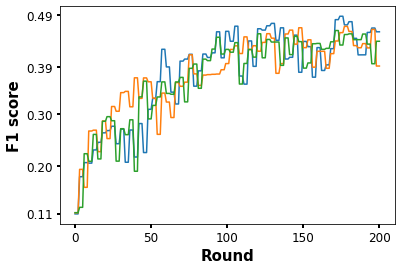

In [7]:
files_need_plot = [
    {'file_path': 'result_pmove/cifar10/freq_3/algoxfed_edgeavg_vx100_freqx3_num_edgex5_num_epochsx5_proportionx0.5_pmove_0.0.csv',
        'key_need_plot': 'test_acc', 'label_name': 'pmove 0.0'},
    {'file_path': 'result_pmove/cifar10/freq_3/algoxfed_edgeavg_vx100_freqx3_num_edgex5_num_epochsx5_proportionx0.5_pmove_0.25.csv',
    'key_need_plot': 'test_acc', 'label_name': 'pmove 0.25'},
    {'file_path': 'result_pmove/cifar10/freq_3/algoxfed_edgeavg_vx100_freqx3_num_edgex5_num_epochsx5_proportionx0.5_pmove_0.5.csv',
        'key_need_plot': 'test_acc', 'label_name': 'pmove 0.5'},
]

plot_result_final(files_need_plot, label_name_plot='cifar10_Fedavg_freq3_compare_pmove', save_file=True)

<!-- Plot cifar10 Fedprox freq 3 -->

Checked
pmove 0.0-  0.489
pmove 0.25-  0.466
pmove 0.5-  0.452


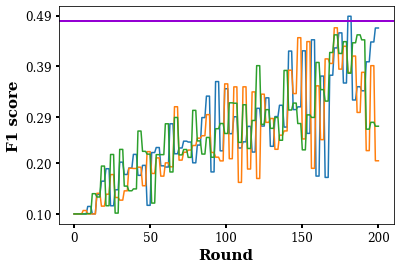

In [8]:
files_need_plot = [
    {'file_path': 'result_pmove/cifar10/freq_3/algoxfedprox_vx100_freqx3_num_edgex5_num_epochsx5_proportionx0.5_pmove_0.0.csv',
        'key_need_plot': 'test_acc', 'label_name': 'pmove 0.0'},
    {'file_path': 'result_pmove/cifar10/freq_3/algoxfedprox_vx100_freqx3_num_edgex5_num_epochsx5_proportionx0.5_pmove_0.25.csv',
    'key_need_plot': 'test_acc', 'label_name': 'pmove 0.25'},
    {'file_path': 'result_pmove/cifar10/freq_3/algoxfedprox_vx100_freqx3_num_edgex5_num_epochsx5_proportionx0.5_pmove_0.5.csv',
        'key_need_plot': 'test_acc', 'label_name': 'pmove 0.5'},
]

plot_result_final(files_need_plot, label_name_plot='cifar10_Fedprox_freq3_compare_pmove', save_file=True, y_plot_compare=0.48)

<!-- Plot cifar10 Moon freq 3 -->

Checked
pmove 0.0-  0.485
pmove 0.25-  0.454
pmove 0.5-  0.446


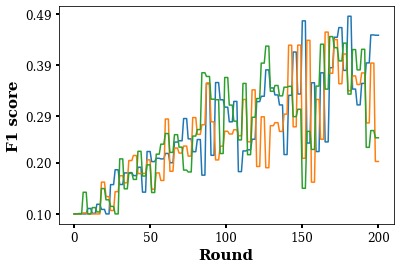

In [9]:
files_need_plot = [
    {'file_path': 'result_pmove/cifar10/freq_3/algoxmoon_vx100_freqx3_num_edgex5_num_epochsx5_proportionx0.5_pmove_0.0.csv',
        'key_need_plot': 'test_acc', 'label_name': 'pmove 0.0'},
    {'file_path': 'result_pmove/cifar10/freq_3/algoxmoon_vx100_freqx3_num_edgex5_num_epochsx5_proportionx0.5_pmove_0.25.csv',
    'key_need_plot': 'test_acc', 'label_name': 'pmove 0.25'},
    {'file_path': 'result_pmove/cifar10/freq_3/algoxmoon_vx100_freqx3_num_edgex5_num_epochsx5_proportionx0.5_pmove_0.5.csv',
        'key_need_plot': 'test_acc', 'label_name': 'pmove 0.5'},
]

plot_result_final(files_need_plot, label_name_plot='cifar10_Moon_freq3_compare_pmove', save_file=True)

<!-- Plot cifar10 Distill freq 3 -->

Checked
pmove 0.0-  0.486
pmove 0.25-  0.523


pmove 0.5-  0.586
pmove 0.0-84
pmove 0.25-9
pmove 0.5-9


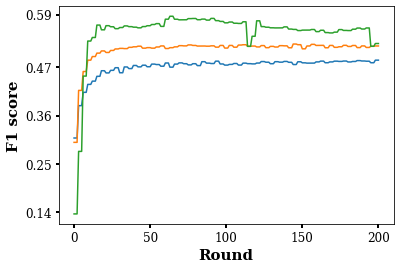

In [10]:
files_need_plot = [
    {'file_path': 'result_pmove/cifar10/freq_3/distill_ipc_20_proportionx1.0_pmove_0.0_edge_freq_3.csv',
        'key_need_plot': 'test_acc', 'label_name': 'pmove 0.0'},
    {'file_path': 'result_pmove/cifar10/freq_3/distill_ipc_20_proportionx1.0_pmove_0.25_edge_freq_3.csv',
    'key_need_plot': 'test_acc', 'label_name': 'pmove 0.25'},
    {'file_path': 'result_pmove/cifar10/freq_3/distill_ipc_20_proportionx0.5_pmove_0.5_edge_freq_3.csv',
        'key_need_plot': 'test_acc', 'label_name': 'pmove 0.5'},
]

plot_result_final(files_need_plot, label_name_plot='cifar10_Distill_freq3_compare_pmove', save_file=True)
min_round_above_threshold(files_need_plot, threshold=0.48)

<!-- Plot cifar10 pmove 0 freq 3-->

Checked
Fedavg-  0.487
Checked
Fedprox-  0.489
Checked
Moon-  0.485
Checked


Distill-  0.486
Fedavg-x
Fedprox-x
Moon-x
Distill-x


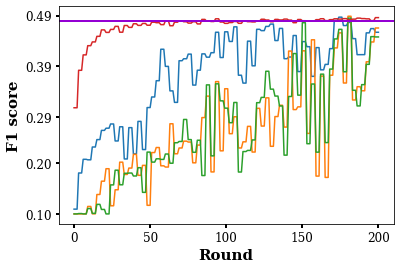

In [11]:
files_need_plot = [
    {'file_path': 'result_pmove/cifar10/freq_3/algoxfed_edgeavg_vx100_freqx3_num_edgex5_num_epochsx5_proportionx0.5_pmove_0.0.csv',
        'key_need_plot': 'test_acc', 'label_name': 'Fedavg'},
    {'file_path': 'result_pmove/cifar10/freq_3/algoxfedprox_vx100_freqx3_num_edgex5_num_epochsx5_proportionx0.5_pmove_0.0.csv',
    'key_need_plot': 'test_acc', 'label_name': 'Fedprox'},
    {'file_path': 'result_pmove/cifar10/freq_3/algoxmoon_vx100_freqx3_num_edgex5_num_epochsx5_proportionx0.5_pmove_0.0.csv',
        'key_need_plot': 'test_acc', 'label_name': 'Moon'},
    {'file_path': 'result_pmove/cifar10/freq_3/distill_ipc_20_proportionx1.0_pmove_0.0_edge_freq_3.csv',
        'key_need_plot': 'test_acc', 'label_name': 'Distill'},
]

plot_result_final(files_need_plot, label_name_plot='Communication cost with pmove 0 freq 3', save_file=True, y_plot_compare=0.48)
min_round_above_threshold(files_need_plot, threshold=0.98)

<!-- Plot cifar10 pmove 0.25 freq 3-->

Fedavg-  615
Fedprox-  615
Moon-  615
Distill-  70.


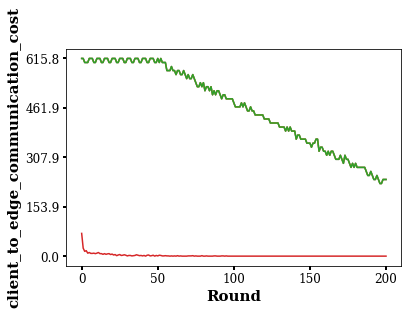

In [12]:
files_need_plot = [
    {'file_path': 'result_pmove/cifar10/freq_3/algoxfed_edgeavg_vx100_freqx3_num_edgex5_num_epochsx5_proportionx0.5_pmove_0.25.csv',
        'key_need_plot': 'client_to_edge_communication_cost', 'label_name': 'Fedavg'},
    {'file_path': 'result_pmove/cifar10/freq_3/algoxfedprox_vx100_freqx3_num_edgex5_num_epochsx5_proportionx0.5_pmove_0.25.csv',
    'key_need_plot': 'client_to_edge_communication_cost', 'label_name': 'Fedprox'},
    {'file_path': 'result_pmove/cifar10/freq_3/algoxmoon_vx100_freqx3_num_edgex5_num_epochsx5_proportionx0.5_pmove_0.25.csv',
        'key_need_plot': 'client_to_edge_communication_cost', 'label_name': 'Moon'},
    {'file_path': 'result_pmove/cifar10/freq_3/distill_ipc_20_proportionx1.0_pmove_0.25_edge_freq_3.csv',
        'key_need_plot': 'client_to_edge_communication_cost', 'label_name': 'Distill'},
]

plot_result_final(files_need_plot, label_name_plot='Communication cost with pmove 0.25 freq 3', save_file=True)

<!-- Freq 3 pmove 0 -->

Checked
Fedavg-  0.487
Checked
Fedprox-  0.489
Checked
Moon-  0.485
Checked
FedDistill-  0.486
Fedavg-171
Fedprox-180
Moon-180
FedDistill-84


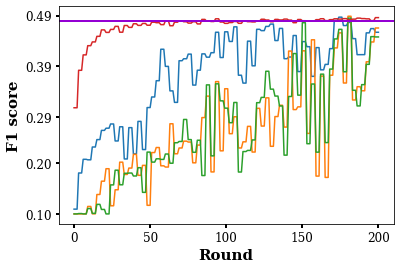

In [13]:
files_need_plot = [
    {'file_path': 'result_pmove/cifar10/freq_3/algoxfed_edgeavg_vx100_freqx3_num_edgex5_num_epochsx5_proportionx0.5_pmove_0.0.csv',
        'key_need_plot': 'test_acc', 'label_name': 'Fedavg'},
    {'file_path': 'result_pmove/cifar10/freq_3/algoxfedprox_vx100_freqx3_num_edgex5_num_epochsx5_proportionx0.5_pmove_0.0.csv',
    'key_need_plot': 'test_acc', 'label_name': 'Fedprox'},
    {'file_path': 'result_pmove/cifar10/freq_3/algoxmoon_vx100_freqx3_num_edgex5_num_epochsx5_proportionx0.5_pmove_0.0.csv',
        'key_need_plot': 'test_acc', 'label_name': 'Moon'},
    {'file_path': 'result_pmove/cifar10/freq_3/distill_ipc_20_proportionx1.0_pmove_0.0_edge_freq_3.csv',
        'key_need_plot': 'test_acc', 'label_name': 'FedDistill'},
]

plot_result_final(files_need_plot, label_name_plot='CIFAR-10 pmove 0.0 Interval 3', save_file=True, show_detail=True, y_plot_compare=0.48)
threshold = 0.48
min_round_above_threshold(files_need_plot, threshold)
# calculate_communication_costs(files_need_plot, title='Communication cost CIFAR-10 pmove 0.0 Interval 3')

<!-- MNIST pmove 0.0 -->

Checked
Fedavg-  0.976
Checked
Fedprox-  0.985
Checked
Moon-  0.976
Checked
FedDistill-  0.98
Fedavg-x
Fedprox-129
Moon-x
FedDistill-198


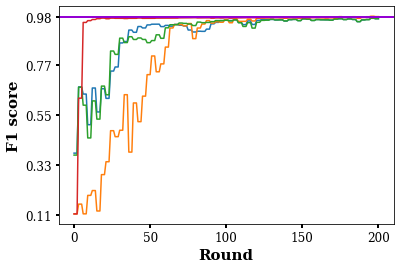

In [14]:
files_need_plot = [
    {'file_path': 'result_pmove/mnist/freq_3/algoxfed_edgeavg_vx100_freqx3_num_edgex5_num_epochsx5_proportionx0.5_pmove_0.0.csv',
        'key_need_plot': 'test_acc', 'label_name': 'Fedavg'},
    {'file_path': 'result_pmove/mnist/freq_3/algoxfedprox_vx100_freqx3_num_edgex5_num_epochsx5_proportionx0.5_pmove_0.0.csv',
    'key_need_plot': 'test_acc', 'label_name': 'Fedprox'},
    {'file_path': 'result_pmove/mnist/freq_3/algoxmoon_vx100_freqx3_num_edgex5_num_epochsx5_proportionx0.5_pmove_0.0.csv',
        'key_need_plot': 'test_acc', 'label_name': 'Moon'},
    {'file_path': 'result_pmove/mnist/freq_3/distill_ipc_20_proportionx0.5_pmove_0.0_edge_freq_3.csv',
        'key_need_plot': 'test_acc', 'label_name': 'FedDistill'},
]

plot_result_final(files_need_plot, label_name_plot='MNIST pmove 0.0 Interval 3', save_file=True, show_detail=True, y_plot_compare=0.98)
threshold = 0.98
min_round_above_threshold(files_need_plot, threshold)
# calculate_communication_costs(files_need_plot)
# calculate_communication_costs(files_need_plot, title='Communication cost MNIST pmove 0.0 Interval 3')


<!-- freq 3 pmove 0.25 -->

Fedavg-  0.468
Fedprox-  0.466
Moon-  0.454
FedDistill-  0.523


Fedavg-x
Fedprox-x
Moon-x
FedDistill-9


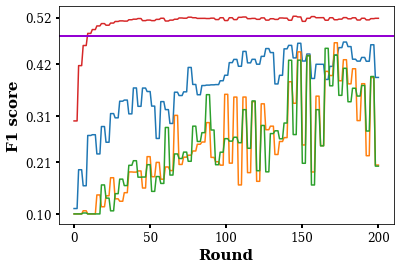

In [15]:
files_need_plot = [
    {'file_path': 'result_pmove/cifar10/freq_3/algoxfed_edgeavg_vx100_freqx3_num_edgex5_num_epochsx5_proportionx0.5_pmove_0.25.csv',
        'key_need_plot': 'test_acc', 'label_name': 'Fedavg'},
    {'file_path': 'result_pmove/cifar10/freq_3/algoxfedprox_vx100_freqx3_num_edgex5_num_epochsx5_proportionx0.5_pmove_0.25.csv',
    'key_need_plot': 'test_acc', 'label_name': 'Fedprox'},
    {'file_path': 'result_pmove/cifar10/freq_3/algoxmoon_vx100_freqx3_num_edgex5_num_epochsx5_proportionx0.5_pmove_0.25.csv',
        'key_need_plot': 'test_acc', 'label_name': 'Moon'},
    {'file_path': 'result_pmove/cifar10/freq_3/distill_ipc_20_proportionx1.0_pmove_0.25_edge_freq_3.csv',
        'key_need_plot': 'test_acc', 'label_name': 'FedDistill'},
]

plot_result_final(files_need_plot, label_name_plot='CIFAR-10 pmove 0.25 Interval 3', save_file=True, y_plot_compare=0.48)
threshold = 0.48
min_round_above_threshold(files_need_plot, threshold)
# calculate_communication_costs(files_need_plot)
# calculate_communication_costs(files_need_plot, title='Communication cost CIFAR-10 pmove 0.25 Interval 3')

<!-- Plot cifar10 pmove 0.5 freq 3-->

<!-- pmove 0.5 mnist -->

Fedavg-  0.976
Fedprox-  0.983
Moon-  0.976
FedDistill-  0.989
Fedavg-x
Fedprox-141
Moon-x
FedDistill-60


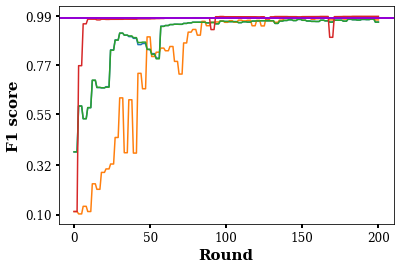

In [16]:
files_need_plot = [
    {'file_path': 'result_pmove/mnist/freq_3/algoxfed_edgeavg_vx100_freqx3_num_edgex5_num_epochsx5_proportionx0.5_pmove_0.25.csv',
        'key_need_plot': 'test_acc', 'label_name': 'Fedavg'},
    {'file_path': 'result_pmove/mnist/freq_3/algoxfedprox_vx100_freqx3_num_edgex5_num_epochsx5_proportionx0.5_pmove_0.25.csv',
    'key_need_plot': 'test_acc', 'label_name': 'Fedprox'},
    {'file_path': 'result_pmove/mnist/freq_3/algoxmoon_vx100_freqx3_num_edgex5_num_epochsx5_proportionx0.5_pmove_0.25.csv',
        'key_need_plot': 'test_acc', 'label_name': 'Moon'},
    {'file_path': 'result_pmove/mnist/freq_3/distill_ipc_20_proportionx0.5_pmove_0.25_edge_freq_3.csv',
        'key_need_plot': 'test_acc', 'label_name': 'FedDistill'},
]

plot_result_final(files_need_plot, label_name_plot='MNIST pmove 0.25 Interval 3', save_file=True, y_plot_compare=0.98)
threshold = 0.98
min_round_above_threshold(files_need_plot, threshold)
# calculate_communication_costs(files_need_plot)
# calculate_communication_costs(files_need_plot, title='Communication cost MNIST pmove 0.25 Interval 3')

<!-- pmove 0.5 freq 3 cifar10 -->

Fedavg-  0.46
Fedprox-  0.452
Moon-  0.446
FedDistill-  0.586
Fedavg-x
Fedprox-x
Moon-x
FedDistill-9


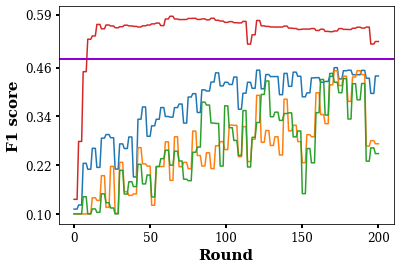

In [17]:
files_need_plot = [
    {'file_path': 'result_pmove/cifar10/freq_3/algoxfed_edgeavg_vx100_freqx3_num_edgex5_num_epochsx5_proportionx0.5_pmove_0.5.csv',
        'key_need_plot': 'test_acc', 'label_name': 'Fedavg'},
    {'file_path': 'result_pmove/cifar10/freq_3/algoxfedprox_vx100_freqx3_num_edgex5_num_epochsx5_proportionx0.5_pmove_0.5.csv',
    'key_need_plot': 'test_acc', 'label_name': 'Fedprox'},
    {'file_path': 'result_pmove/cifar10/freq_3/algoxmoon_vx100_freqx3_num_edgex5_num_epochsx5_proportionx0.5_pmove_0.5.csv',
        'key_need_plot': 'test_acc', 'label_name': 'Moon'},
    {'file_path': 'result_pmove/cifar10/freq_3/distill_ipc_20_proportionx0.5_pmove_0.5_edge_freq_3.csv',
        'key_need_plot': 'test_acc', 'label_name': 'FedDistill'},
]

plot_result_final(files_need_plot, label_name_plot='CIFAR-10 pmove 0.5 Interval 3', save_file=True, y_plot_compare=0.48)
threshold = 0.48
min_round_above_threshold(files_need_plot, threshold)
# calculate_communication_costs(files_need_plot)
# calculate_communication_costs(files_need_plot, title='Communication cost CIFAR-10 pmove 0.5 Interval 3')


<!-- mnist - pmove  0.5 -->

Fedavg-  0.976
Fedprox-  0.983
Moon-  0.976


Distill-  0.989
Fedavg-x
Fedprox-171
Moon-x
Distill-51


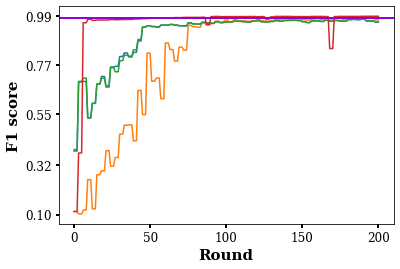

In [18]:
files_need_plot = [
    {'file_path': 'result_pmove/mnist/freq_3/algoxfed_edgeavg_vx100_freqx3_num_edgex5_num_epochsx5_proportionx0.5_pmove_0.5.csv',
        'key_need_plot': 'test_acc', 'label_name': 'Fedavg'},
    {'file_path': 'result_pmove/mnist/freq_3/algoxfedprox_vx100_freqx3_num_edgex5_num_epochsx5_proportionx0.5_pmove_0.5.csv',
    'key_need_plot': 'test_acc', 'label_name': 'Fedprox'},
    {'file_path': 'result_pmove/mnist/freq_3/algoxmoon_vx100_freqx3_num_edgex5_num_epochsx5_proportionx0.5_pmove_0.5.csv',
        'key_need_plot': 'test_acc', 'label_name': 'Moon'},
    {'file_path': 'result_pmove/mnist/freq_3/distill_ipc_20_proportionx0.5_pmove_0.5_edge_freq_3.csv',
        'key_need_plot': 'test_acc', 'label_name': 'Distill'},
]

plot_result_final(files_need_plot, label_name_plot='MNIST pmove 0.5 Interval 3', save_file=True, y_plot_compare=0.98)
threshold = 0.98
min_round_above_threshold(files_need_plot, threshold)
# calculate_communication_costs(files_need_plot)
# calculate_communication_costs(files_need_plot, title='Communication cost MNIST pmove 0.5 Interval 3')


<!-- Plot pmove 0.25 Freq 1-->

Fedavg-  0.589
Fedprox-  0.627
Moon-  0.591
FedDistill-  0.597


Fedavg-103
Fedprox-119
Moon-117
FedDistill-7


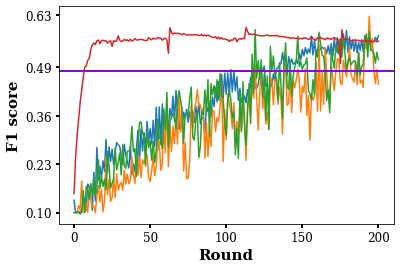

In [19]:
files_need_plot = [
    {'file_path': 'result_pmove/cifar10/freq_1/algoxfed_edgeavg_vx100_freqx1_num_edgex5_num_epochsx5_proportionx1.0_pmove_0.25.csv',
        'key_need_plot': 'test_acc', 'label_name': 'Fedavg'},
    {'file_path': 'result_pmove/cifar10/freq_1/algoxfedprox_vx100_freqx1_num_edgex5_num_epochsx5_proportionx0.5_pmove_0.25.csv',
    'key_need_plot': 'test_acc', 'label_name': 'Fedprox'},
    {'file_path': 'result_pmove/cifar10/freq_1/algoxmoon_vx100_freqx1_num_edgex5_num_epochsx5_proportionx0.5_pmove_0.25.csv',
        'key_need_plot': 'test_acc', 'label_name': 'Moon'},
    {'file_path': 'result_pmove/cifar10/freq_1/distill_ipc_20_proportionx0.5_pmove_0.25_edge_freq_1.csv',
        'key_need_plot': 'test_acc', 'label_name': 'FedDistill'},
]

plot_result_final(files_need_plot, label_name_plot='CIFAR-10 pmove 0.25 Interval 1', save_file=True, y_plot_compare=0.48)
threshold = 0.48
min_round_above_threshold(files_need_plot, threshold)
# calculate_communication_costs(files_need_plot)

<!-- Mnist freq 1  -->

Fedavg-  0.99
Fedprox-  0.989
Moon-  0.99


Distill-  0.99
Fedavg-24
Fedprox-31
Moon-22
Distill-3


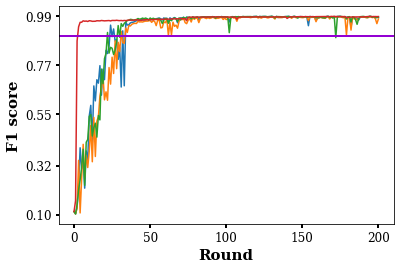

In [20]:
files_need_plot = [
    {'file_path': 'result_pmove/mnist/freq_1/algoxfed_edgeavg_vx100_freqx1_num_edgex5_num_epochsx5_proportionx0.5_pmove_0.25.csv',
        'key_need_plot': 'test_acc', 'label_name': 'Fedavg'},
    {'file_path': 'result_pmove/mnist/freq_1/algoxfedprox_vx100_freqx1_num_edgex5_num_epochsx5_proportionx0.5_pmove_0.25.csv',
    'key_need_plot': 'test_acc', 'label_name': 'Fedprox'},
    {'file_path': 'result_pmove/mnist/freq_1/algoxmoon_vx100_freqx1_num_edgex5_num_epochsx5_proportionx0.5_pmove_0.25.csv',
        'key_need_plot': 'test_acc', 'label_name': 'Moon'},
    {'file_path': 'result_pmove/mnist/freq_1/distill_ipc_20_proportionx0.5_pmove_0.25_edge_freq_1.csv',
        'key_need_plot': 'test_acc', 'label_name': 'Distill'},
]

plot_result_final(files_need_plot, label_name_plot='MNIST pmove 0.25 Interval 1', save_file=True,y_plot_compare=0.9)
threshold = 0.9
min_round_above_threshold(files_need_plot, threshold)
# calculate_communication_costs(files_need_plot)

<!-- Plot pmove 0.25 Freq 3-->

<!-- cifar10 - freq 3 -->

Fedavg-  0.468
Fedprox-  0.466
Moon-  0.454
Distill-  0.523


Fedavg-x
Fedprox-x
Moon-x
Distill-75


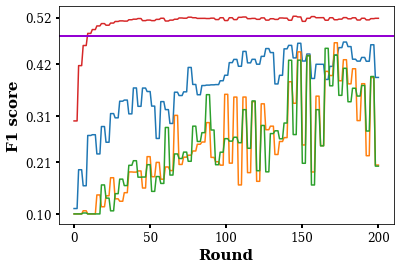

In [21]:
files_need_plot = [
    {'file_path': 'result_pmove/cifar10/freq_3/algoxfed_edgeavg_vx100_freqx3_num_edgex5_num_epochsx5_proportionx0.5_pmove_0.25.csv',
        'key_need_plot': 'test_acc', 'label_name': 'Fedavg'},
    {'file_path': 'result_pmove/cifar10/freq_3/algoxfedprox_vx100_freqx3_num_edgex5_num_epochsx5_proportionx0.5_pmove_0.25.csv',
    'key_need_plot': 'test_acc', 'label_name': 'Fedprox'},
    {'file_path': 'result_pmove/cifar10/freq_3/algoxmoon_vx100_freqx3_num_edgex5_num_epochsx5_proportionx0.5_pmove_0.25.csv',
        'key_need_plot': 'test_acc', 'label_name': 'Moon'},
    {'file_path': 'result_pmove/cifar10/freq_3/distill_ipc_20_proportionx1.0_pmove_0.25_edge_freq_3.csv',
        'key_need_plot': 'test_acc', 'label_name': 'Distill'},
]

plot_result_final(files_need_plot, label_name_plot='CIFAR-10 pmove 0.25 Interval 3', save_file=True,y_plot_compare=0.48)
threshold = 0.52
min_round_above_threshold(files_need_plot, threshold)
# calculate_communication_costs(files_need_plot)

<!-- Freq 3 - mnist -->

Fedavg-  0.976


Fedprox-  0.983
Moon-  0.976
Distill-  0.989
Fedavg-30
Fedprox-75
Moon-30
Distill-6


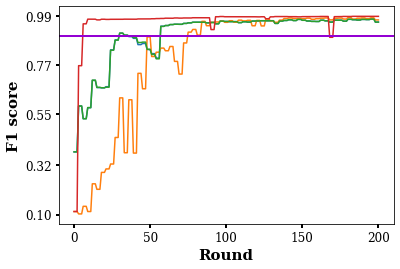

In [22]:
files_need_plot = [
    {'file_path': 'result_pmove/mnist/freq_3/algoxfed_edgeavg_vx100_freqx3_num_edgex5_num_epochsx5_proportionx0.5_pmove_0.25.csv',
        'key_need_plot': 'test_acc', 'label_name': 'Fedavg'},
    {'file_path': 'result_pmove/mnist/freq_3/algoxfedprox_vx100_freqx3_num_edgex5_num_epochsx5_proportionx0.5_pmove_0.25.csv',
    'key_need_plot': 'test_acc', 'label_name': 'Fedprox'},
    {'file_path': 'result_pmove/mnist/freq_3/algoxmoon_vx100_freqx3_num_edgex5_num_epochsx5_proportionx0.5_pmove_0.25.csv',
        'key_need_plot': 'test_acc', 'label_name': 'Moon'},
    {'file_path': 'result_pmove/mnist/freq_3/distill_ipc_20_proportionx0.5_pmove_0.25_edge_freq_3.csv',
        'key_need_plot': 'test_acc', 'label_name': 'Distill'},
]

plot_result_final(files_need_plot, label_name_plot='MNIST pmove 0.25 Interval 3', save_file=True,y_plot_compare=0.9)
threshold = 0.9
min_round_above_threshold(files_need_plot, threshold)
# calculate_communication_costs(files_need_plot)

<!-- Plot pmove 0.25 Freq 6 -->

<!-- Freq 6 - cifar 10  -->

Fedavg-  0.346
Fedprox-  0.366
Moon-  0.393


Distill-  0.6
Fedavg-x
Fedprox-x
Moon-x
Distill-12


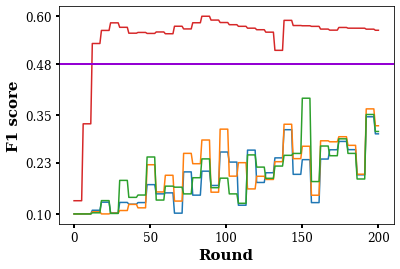

In [23]:
files_need_plot = [
    {'file_path': 'result_pmove/cifar10/freq_6/algoxfed_edgeavg_vx100_freqx6_num_edgex5_num_epochsx5_proportionx0.5_pmove_0.25.csv',
        'key_need_plot': 'test_acc', 'label_name': 'Fedavg'},
    {'file_path': 'result_pmove/cifar10/freq_6/algoxfedprox_vx100_freqx6_num_edgex5_num_epochsx5_proportionx0.5_pmove_0.25.csv',
    'key_need_plot': 'test_acc', 'label_name': 'Fedprox'},
    {'file_path': 'result_pmove/cifar10/freq_6/algoxmoon_vx100_freqx6_num_edgex5_num_epochsx5_proportionx0.5_pmove_0.25.csv',
        'key_need_plot': 'test_acc', 'label_name': 'Moon'},
    {'file_path': 'result_pmove/cifar10/freq_6/distill_ipc_20_proportionx0.5_pmove_0.25_edge_freq_6.csv',
        'key_need_plot': 'test_acc', 'label_name': 'Distill'},
]

plot_result_final(files_need_plot, label_name_plot='CIFAR-10 pmove 0.25 Interval 6', save_file=True,y_plot_compare=0.48)
threshold = 0.52
min_round_above_threshold(files_need_plot, threshold)
# calculate_communication_costs(files_need_plot)

<!-- Plot pmove 0.25 Freq 6-->

<!-- mnist freq 6 -->

Fedavg-  0.958
Fedprox-  0.964
Moon-  0.958
Distill-  0.989


Fedavg-66
Fedprox-120
Moon-66
Distill-6


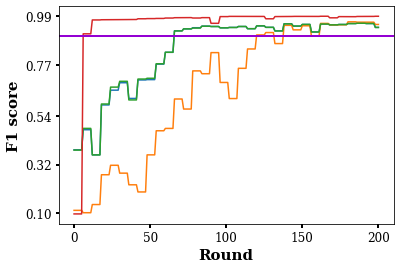

In [24]:
files_need_plot = [
    {'file_path': 'result_pmove/mnist/freq_6/algoxfed_edgeavg_vx100_freqx6_num_edgex5_num_epochsx5_proportionx0.5_pmove_0.25.csv',
        'key_need_plot': 'test_acc', 'label_name': 'Fedavg'},
    {'file_path': 'result_pmove/mnist/freq_6/algoxfedprox_vx100_freqx6_num_edgex5_num_epochsx5_proportionx0.5_pmove_0.25.csv',
    'key_need_plot': 'test_acc', 'label_name': 'Fedprox'},
    {'file_path': 'result_pmove/mnist/freq_6/algoxmoon_vx100_freqx6_num_edgex5_num_epochsx5_proportionx0.5_pmove_0.25.csv',
        'key_need_plot': 'test_acc', 'label_name': 'Moon'},
    {'file_path': 'result_pmove/mnist/freq_6/distill_ipc_20_proportionx1.0_pmove_0.25_edge_freq_6.csv',
        'key_need_plot': 'test_acc', 'label_name': 'Distill'},
]

plot_result_final(files_need_plot, label_name_plot='MNIST pmove 0.25 Interval 6', save_file=True,y_plot_compare=0.9)
threshold = 0.9
min_round_above_threshold(files_need_plot, threshold)
# calculate_communication_costs(files_need_plot)

<!-- Plot pmove 0.25 Freq 9 -->

Fedavg-  0.264
Fedprox-  0.273
Moon-  0.282
Distill-  0.594


Fedavg-x
Fedprox-x
Moon-x
Distill-18


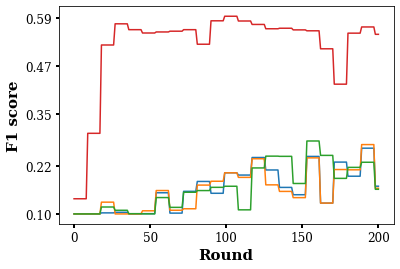

In [25]:
files_need_plot = [
    {'file_path': 'result_pmove/cifar10/freq_9/algoxfed_edgeavg_vx100_freqx9_num_edgex5_num_epochsx5_proportionx0.5_pmove_0.25.csv',
        'key_need_plot': 'test_acc', 'label_name': 'Fedavg'},
    {'file_path': 'result_pmove/cifar10/freq_9/algoxfedprox_vx100_freqx9_num_edgex5_num_epochsx5_proportionx0.5_pmove_0.25.csv',
    'key_need_plot': 'test_acc', 'label_name': 'Fedprox'},
    {'file_path': 'result_pmove/cifar10/freq_9/algoxmoon_vx100_freqx9_num_edgex5_num_epochsx5_proportionx0.5_pmove_0.25.csv',
        'key_need_plot': 'test_acc', 'label_name': 'Moon'},
    {'file_path': 'result_pmove/cifar10/freq_9/distill_ipc_20_proportionx0.5_pmove_0.25_edge_freq_9.csv',
        'key_need_plot': 'test_acc', 'label_name': 'Distill'},
]

plot_result_final(files_need_plot, label_name_plot='cifar10_pmove_0.25_freq9_compare', save_file=True)
threshold = 0.52
min_round_above_threshold(files_need_plot, threshold)
# calculate_communication_costs(files_need_plot)

<!-- Compare freq in fed avg -->

Freq 1-  0.589
Freq 3-  0.468
Freq 6-  0.346
Freq 9-  0.264


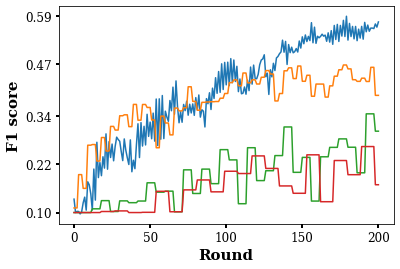

In [26]:
files_need_plot = [
    {'file_path': 'result_pmove/cifar10/freq_1/algoxfed_edgeavg_vx100_freqx1_num_edgex5_num_epochsx5_proportionx1.0_pmove_0.25.csv',
        'key_need_plot': 'test_acc', 'label_name': 'Freq 1'},
    {'file_path': 'result_pmove/cifar10/freq_3/algoxfed_edgeavg_vx100_freqx3_num_edgex5_num_epochsx5_proportionx0.5_pmove_0.25.csv',
    'key_need_plot': 'test_acc', 'label_name': 'Freq 3'},
    {'file_path': 'result_pmove/cifar10/freq_6/algoxfed_edgeavg_vx100_freqx6_num_edgex5_num_epochsx5_proportionx0.5_pmove_0.25.csv',
        'key_need_plot': 'test_acc', 'label_name': 'Freq 6'},
    {'file_path': 'result_pmove/cifar10/freq_9/algoxfed_edgeavg_vx100_freqx9_num_edgex5_num_epochsx5_proportionx0.5_pmove_0.25.csv',
        'key_need_plot': 'test_acc', 'label_name': 'Freq 9'},
]

plot_result_final(files_need_plot, label_name_plot='cifar10_Fedavg_compare_freq', save_file=True)

<!-- Compare freq in fedprox -->

Freq 1-  0.627
Freq 3-  0.466
Freq 6-  0.366
Freq 9-  0.273


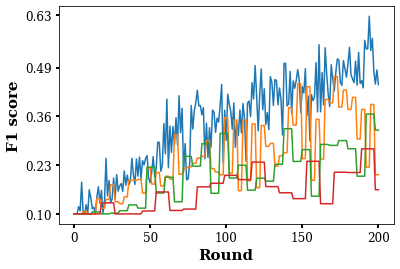

In [27]:
files_need_plot = [
    {'file_path': 'result_pmove/cifar10/freq_1/algoxfedprox_vx100_freqx1_num_edgex5_num_epochsx5_proportionx0.5_pmove_0.25.csv',
        'key_need_plot': 'test_acc', 'label_name': 'Freq 1'},
    {'file_path': 'result_pmove/cifar10/freq_3/algoxfedprox_vx100_freqx3_num_edgex5_num_epochsx5_proportionx0.5_pmove_0.25.csv',
    'key_need_plot': 'test_acc', 'label_name': 'Freq 3'},
    {'file_path': 'result_pmove/cifar10/freq_6/algoxfedprox_vx100_freqx6_num_edgex5_num_epochsx5_proportionx0.5_pmove_0.25.csv',
        'key_need_plot': 'test_acc', 'label_name': 'Freq 6'},
    {'file_path': 'result_pmove/cifar10/freq_9/algoxfedprox_vx100_freqx9_num_edgex5_num_epochsx5_proportionx0.5_pmove_0.25.csv',
        'key_need_plot': 'test_acc', 'label_name': 'Freq 9'},
]

plot_result_final(files_need_plot, label_name_plot='cifar10_Fedprox_compare_freq', save_file=True)

<!-- Compare freq in moon -->

Freq 1-  0.591
Freq 3-  0.454
Freq 6-  0.393
Freq 9-  0.282


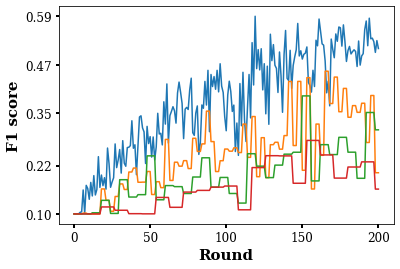

In [28]:
files_need_plot = [
    {'file_path': 'result_pmove/cifar10/freq_1/algoxmoon_vx100_freqx1_num_edgex5_num_epochsx5_proportionx0.5_pmove_0.25.csv',
        'key_need_plot': 'test_acc', 'label_name': 'Freq 1'},
    {'file_path': 'result_pmove/cifar10/freq_3/algoxmoon_vx100_freqx3_num_edgex5_num_epochsx5_proportionx0.5_pmove_0.25.csv',
    'key_need_plot': 'test_acc', 'label_name': 'Freq 3'},
    {'file_path': 'result_pmove/cifar10/freq_6/algoxmoon_vx100_freqx6_num_edgex5_num_epochsx5_proportionx0.5_pmove_0.25.csv',
        'key_need_plot': 'test_acc', 'label_name': 'Freq 6'},
    {'file_path': 'result_pmove/cifar10/freq_9/algoxmoon_vx100_freqx9_num_edgex5_num_epochsx5_proportionx0.5_pmove_0.25.csv',
        'key_need_plot': 'test_acc', 'label_name': 'Freq 9'},
]

plot_result_final(files_need_plot, label_name_plot='cifar10_Moon_compare_freq', save_file=True)

<!-- Compare freq in distill -->

Freq 1-  0.597
Freq 3-  0.523
Freq 6-  0.6
Freq 9-  0.594


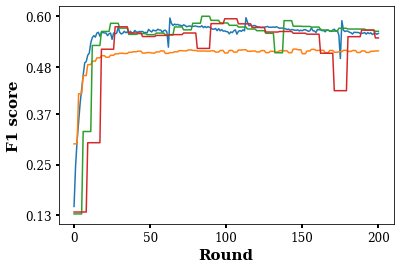

In [29]:
files_need_plot = [
    {'file_path': 'result_pmove/cifar10/freq_1/distill_ipc_20_proportionx0.5_pmove_0.25_edge_freq_1.csv',
        'key_need_plot': 'test_acc', 'label_name': 'Freq 1'},
    {'file_path': 'result_pmove/cifar10/freq_3/distill_ipc_20_proportionx1.0_pmove_0.25_edge_freq_3.csv',
    'key_need_plot': 'test_acc', 'label_name': 'Freq 3'},
    {'file_path': 'result_pmove/cifar10/freq_6/distill_ipc_20_proportionx0.5_pmove_0.25_edge_freq_6.csv',
        'key_need_plot': 'test_acc', 'label_name': 'Freq 6'},
    {'file_path': 'result_pmove/cifar10/freq_9/distill_ipc_20_proportionx0.5_pmove_0.25_edge_freq_9.csv',
        'key_need_plot': 'test_acc', 'label_name': 'Freq 9'},
]

plot_result_final(files_need_plot, label_name_plot='cifar10_Distill_compare_freq', save_file=True)

<!-- Compare in freq 3 and difference ipc -->

<!-- cifar 10 freq 3 - efficient of ipc -->

1-x
5-x
10-x
20-75
30-18
4.2282190990448
1: 4.2282190990448 MB
4.298377729415893
5: 4.298377729415893 MB
4.386292158126831
10: 4.386292158126831 MB
4.563589944839477
20: 4.563589944839477 MB
4.738074506759643
30: 4.738074506759643 MB


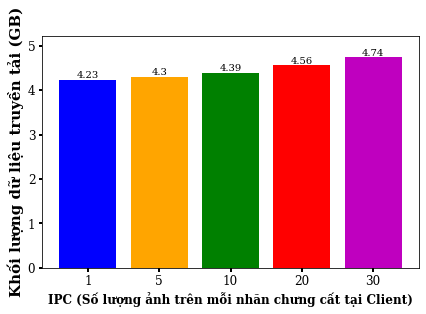

In [30]:
files_need_plot = [
    {'file_path': 'result_pmove/cifar10/freq_3/distill_ipc_1_proportionx0.5_pmove_0.25_edge_freq_3.csv',
        'key_need_plot': 'test_acc', 'label_name': '1'},
    {'file_path': 'result_pmove/cifar10/freq_3/distill_ipc_5_proportionx0.5_pmove_0.25_edge_freq_3.csv',
    'key_need_plot': 'test_acc', 'label_name': '5'},
    {'file_path': 'result_pmove/cifar10/freq_3/distill_ipc_10_proportionx0.5_pmove_0.25_edge_freq_3.csv',
        'key_need_plot': 'test_acc', 'label_name': '10'},
    {'file_path': 'result_pmove/cifar10/freq_3/distill_ipc_20_proportionx1.0_pmove_0.25_edge_freq_3.csv',
        'key_need_plot': 'test_acc', 'label_name': '20'},
    {'file_path': 'result_pmove/cifar10/freq_3/distill_ipc_30_proportionx0.5_pmove_0.25_edge_freq_3.csv',
        'key_need_plot': 'test_acc', 'label_name': '30'},
]

# plot_result_final(files_need_plot, label_name_plot='Cifar-10 Distill different ipc', save_file=True)
threshold = 0.52
min_round_above_threshold(files_need_plot, threshold)
calculate_communication_costs(files_need_plot, title='CIFAR-10_com_cost_ipc')

<!-- efficient of ipc mnist -->

1-x
5-x
10-168
20-60
30-12
4.213757917404175
1: 4.213757917404175 MB
4.231955610275269
5: 4.231955610275269 MB
4.254600446701049
10: 4.254600446701049 MB
4.2999326000213625
20: 4.2999326000213625 MB
4.345159406661987
30: 4.345159406661987 MB


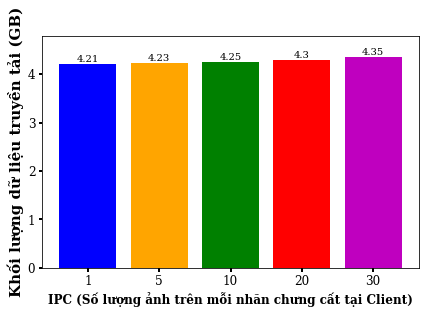

In [31]:
files_need_plot = [
    {'file_path': 'result_pmove/mnist/freq_3/distill_ipc_1_proportionx0.5_pmove_0.25_edge_freq_3.csv',
        'key_need_plot': 'test_acc', 'label_name': '1'},
    {'file_path': 'result_pmove/mnist/freq_3/distill_ipc_5_proportionx0.5_pmove_0.25_edge_freq_3.csv',
    'key_need_plot': 'test_acc', 'label_name': '5'},
    {'file_path': 'result_pmove/mnist/freq_3/distill_ipc_10_proportionx0.5_pmove_0.25_edge_freq_3.csv',
        'key_need_plot': 'test_acc', 'label_name': '10'},
    {'file_path': 'result_pmove/mnist/freq_3/distill_ipc_20_proportionx0.5_pmove_0.25_edge_freq_3.csv',
        'key_need_plot': 'test_acc', 'label_name': '20'},
    {'file_path': 'result_pmove/mnist/freq_3/distill_ipc_30_proportionx0.5_pmove_0.25_edge_freq_3.csv',
        'key_need_plot': 'test_acc', 'label_name': '30'},
]

# plot_result_final(files_need_plot, label_name_plot='MNIST Distill different ipc', save_file=True)
threshold = 0.98
min_round_above_threshold(files_need_plot, threshold)
calculate_communication_costs(files_need_plot, title='MNIST_com_cost_ipc')